In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('..\$ Datasets\Part 6 - Reinforcement Learning\Section 33 - Thompson Sampling\Python\Ads_CTR_Optimisation.csv')
df

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [12]:
import random

N = 10000
d = 10
ads_selected = []
numbers_of_rewards1 = [0]*d
numbers_of_rewards0 = [0]*d
total_reward = 0

for n in range(N):
    ad = 0
    max_random = 0

    for i in range(d):
        random_beta = random.betavariate(numbers_of_rewards0[i]+1, numbers_of_rewards1[i]+1 )
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = df.values[n, ad]
    if reward == 1:
        numbers_of_rewards1[ad] += 1
    else:
        numbers_of_rewards0[ad] += 1
    total_reward += reward

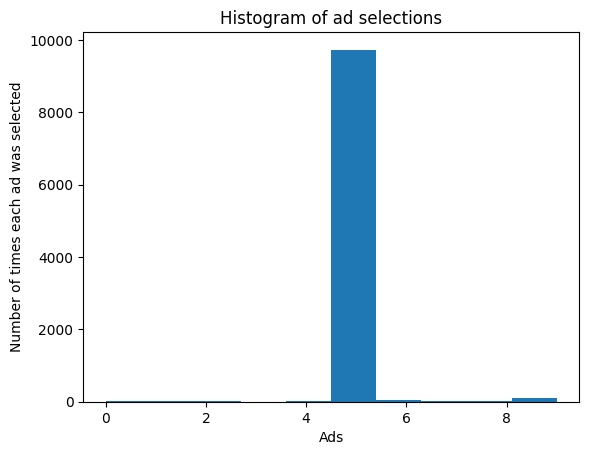

In [13]:
plt.hist(ads_selected)
plt.title('Histogram of ad selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()